In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
data = pd.read_csv("../data/raw/AVF3_RL_Adi_T2DM_HBA1C_V220220928034233_TimeSeries.csv")

In [3]:
interest_feature_list = ['SYSTOLIC_BLOOD_PRESSURE', 'BMI', 'HIGH_DENSITY_LIPOPROTEIN', 
                         'LOW_DENSITY_LIPOPROTEIN', 'SERUM_CHOLESTEROL', 
                         'HBA1C_-_DIABETIC_CONTROL', 'TRIGLYCERIDES', 'SERUM_CREATININE']

treatment_list = ['INSULIN_GOLD_OPTIMAL', 'THIAZOLIDINEDIONE_GOLD_OPTIMAL', 'SULPHONYLUREAS_GOLD_OPTIMAL', 
                  'MEGLITINIDES_GOLD_OPTIMAL', 'METFORMIN_GOLD_OPTIMAL', 'DPP4INHIBITORS_GOLD_OPTIMAL', 
                  'DPP4INHIBITORS_OPTIMAL', 'GLP1_GOLD_OPTIMAL', 'ACARBOSE_GOLD_OPTIMAL', 
                  'SGLT2INHIBITORS_GOLD_OPTIMAL', 'SGLT2INHIBITORS_OPTIMAL']

In [4]:
for ftr in interest_feature_list:
    print(ftr, f": {round((data[ftr].isna().sum() / len(data[ftr])) * 100,2)}%" )

SYSTOLIC_BLOOD_PRESSURE : 56.47%
BMI : 63.83%
HIGH_DENSITY_LIPOPROTEIN : 56.18%
LOW_DENSITY_LIPOPROTEIN : 65.29%
SERUM_CHOLESTEROL : 50.7%
HBA1C_-_DIABETIC_CONTROL : 40.69%
TRIGLYCERIDES : 62.39%
SERUM_CREATININE : 40.69%


In [28]:
data['PRACTICE_ID'] = data['PRACTICE_PATIENT_ID'].str.split("_").str[0]
data['PATIENT_ID'] = data['PRACTICE_PATIENT_ID'].str.split("_").str[1]

In [34]:
def foo(group, col_name):
    nan_prop = (group[col_name].isnull().sum()/len(group))*100
    return nan_prop
    
sbp_df = data.groupby(['PRACTICE_ID', 'PATIENT_ID']).apply(foo, col_name="SYSTOLIC_BLOOD_PRESSURE").reset_index().rename(columns={0: "PROP"})
bmi_df = data.groupby(['PRACTICE_ID', 'PATIENT_ID']).apply(foo, col_name="BMI").reset_index().rename(columns={0: "PROP"})
hdl_df = data.groupby(['PRACTICE_ID', 'PATIENT_ID']).apply(foo, col_name="HIGH_DENSITY_LIPOPROTEIN").reset_index().rename(columns={0: "PROP"})
ldl_df = data.groupby(['PRACTICE_ID', 'PATIENT_ID']).apply(foo, col_name="LOW_DENSITY_LIPOPROTEIN").reset_index().rename(columns={0: "PROP"})
sch_df = data.groupby(['PRACTICE_ID', 'PATIENT_ID']).apply(foo, col_name="SERUM_CHOLESTEROL").reset_index().rename(columns={0: "PROP"})
a1c_df = data.groupby(['PRACTICE_ID', 'PATIENT_ID']).apply(foo, col_name="HBA1C_-_DIABETIC_CONTROL").reset_index().rename(columns={0: "PROP"})
tgs_df = data.groupby(['PRACTICE_ID', 'PATIENT_ID']).apply(foo, col_name="TRIGLYCERIDES").reset_index().rename(columns={0: "PROP"})
sct_df = data.groupby(['PRACTICE_ID', 'PATIENT_ID']).apply(foo, col_name="SERUM_CREATININE").reset_index().rename(columns={0: "PROP"})

In [36]:
sbp_df

,PRACTICE_ID,PATIENT_ID,PROP
0,p10001,1006610001,50.000000
1,p10001,1007010001,58.333333
2,p10001,1007210001,66.666667
3,p10001,100910001,66.666667
4,p10001,1012810001,58.333333
...,...,...,...
490969,p10962,976610962,38.888889
490970,p10962,979810962,38.095238
490971,p10962,98110962,60.000000
490972,p10962,996110962,60.000000


<AxesSubplot:xlabel='PRACTICE_ID', ylabel='PROP'>

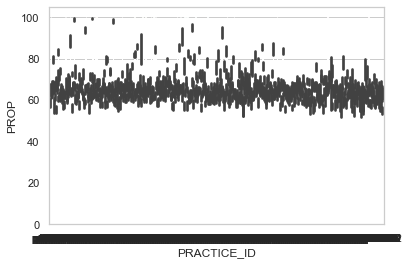

In [37]:
sns.barplot(data=sbp_df, x="PRACTICE_ID", y="PROP")

<AxesSubplot:xlabel='PRACTICE_ID', ylabel='PROP'>

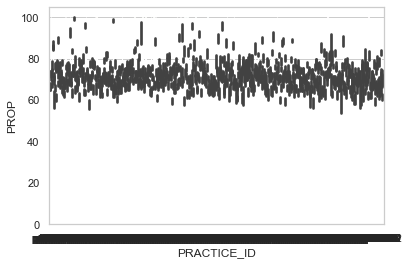

In [38]:
sns.barplot(data=bmi_df, x="PRACTICE_ID", y="PROP")

<AxesSubplot:xlabel='PRACTICE_ID', ylabel='PROP'>

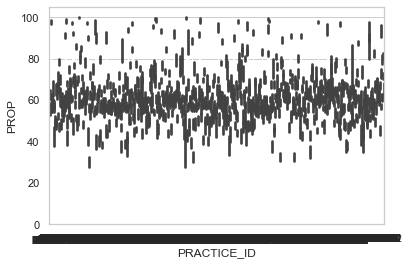

In [39]:
sns.barplot(data=hdl_df, x="PRACTICE_ID", y="PROP")

<AxesSubplot:xlabel='PRACTICE_ID', ylabel='PROP'>

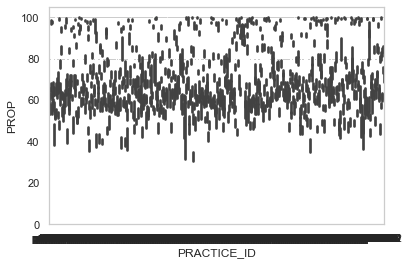

In [40]:
sns.barplot(data=ldl_df, x="PRACTICE_ID", y="PROP")

<AxesSubplot:xlabel='PRACTICE_ID', ylabel='PROP'>

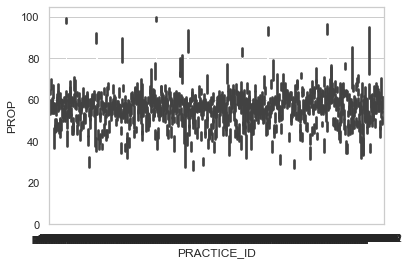

In [41]:
sns.barplot(data=sch_df, x="PRACTICE_ID", y="PROP")

<AxesSubplot:xlabel='PRACTICE_ID', ylabel='PROP'>

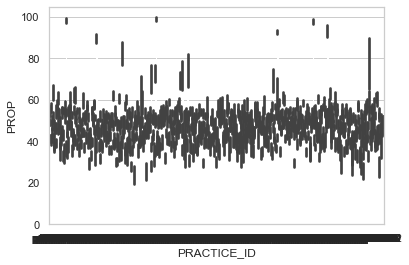

In [42]:
sns.barplot(data=a1c_df, x="PRACTICE_ID", y="PROP")

<AxesSubplot:xlabel='PRACTICE_ID', ylabel='PROP'>

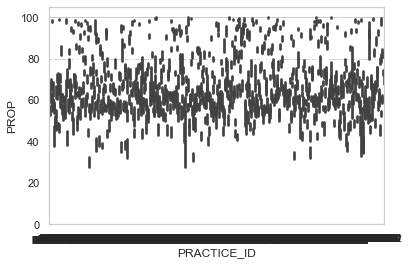

In [43]:
sns.barplot(data=tgs_df, x="PRACTICE_ID", y="PROP")

<AxesSubplot:xlabel='PRACTICE_ID', ylabel='PROP'>

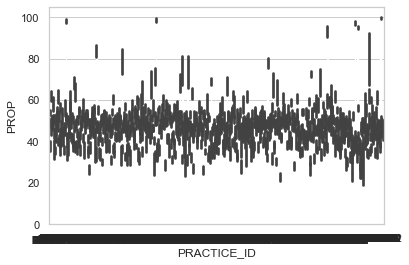

In [44]:
sns.barplot(data=sct_df, x="PRACTICE_ID", y="PROP")

In [55]:
data['AGE_CAT'] = pd.cut(data['AGE'], [0, 18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 80, 120])

In [70]:
def foo(group, col_name):
    nan_prop = (group[col_name].isnull().sum()/len(group))*100
    return nan_prop
    
sbp_df = data.groupby(['AGE_CAT', 'PRACTICE_PATIENT_ID']).apply(foo, col_name="SYSTOLIC_BLOOD_PRESSURE").reset_index().rename(columns={0: "PROP"})
bmi_df = data.groupby(['AGE_CAT', 'PRACTICE_PATIENT_ID']).apply(foo, col_name="BMI").reset_index().rename(columns={0: "PROP"})
hdl_df = data.groupby(['AGE_CAT', 'PRACTICE_PATIENT_ID']).apply(foo, col_name="HIGH_DENSITY_LIPOPROTEIN").reset_index().rename(columns={0: "PROP"})
ldl_df = data.groupby(['AGE_CAT', 'PRACTICE_PATIENT_ID']).apply(foo, col_name="LOW_DENSITY_LIPOPROTEIN").reset_index().rename(columns={0: "PROP"})
sch_df = data.groupby(['AGE_CAT', 'PRACTICE_PATIENT_ID']).apply(foo, col_name="SERUM_CHOLESTEROL").reset_index().rename(columns={0: "PROP"})
a1c_df = data.groupby(['AGE_CAT', 'PRACTICE_PATIENT_ID']).apply(foo, col_name="HBA1C_-_DIABETIC_CONTROL").reset_index().rename(columns={0: "PROP"})
tgs_df = data.groupby(['AGE_CAT', 'PRACTICE_PATIENT_ID']).apply(foo, col_name="TRIGLYCERIDES").reset_index().rename(columns={0: "PROP"})
sct_df = data.groupby(['AGE_CAT', 'PRACTICE_PATIENT_ID']).apply(foo, col_name="SERUM_CREATININE").reset_index().rename(columns={0: "PROP"})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '(0, 18]'),
  Text(1, 0, '(18, 25]'),
  Text(2, 0, '(25, 30]'),
  Text(3, 0, '(30, 35]'),
  Text(4, 0, '(35, 40]'),
  Text(5, 0, '(40, 45]'),
  Text(6, 0, '(45, 50]'),
  Text(7, 0, '(50, 55]'),
  Text(8, 0, '(55, 60]'),
  Text(9, 0, '(60, 65]'),
  Text(10, 0, '(65, 70]'),
  Text(11, 0, '(70, 80]'),
  Text(12, 0, '(80, 120]')])

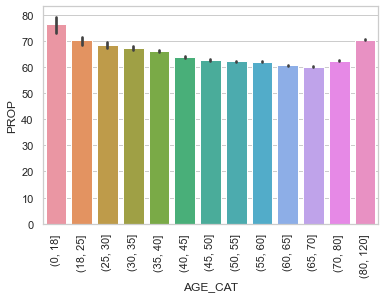

In [66]:
sns.barplot(data=sbp_df, x="AGE_CAT", y="PROP")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '(0, 18]'),
  Text(1, 0, '(18, 25]'),
  Text(2, 0, '(25, 30]'),
  Text(3, 0, '(30, 35]'),
  Text(4, 0, '(35, 40]'),
  Text(5, 0, '(40, 45]'),
  Text(6, 0, '(45, 50]'),
  Text(7, 0, '(50, 55]'),
  Text(8, 0, '(55, 60]'),
  Text(9, 0, '(60, 65]'),
  Text(10, 0, '(65, 70]'),
  Text(11, 0, '(70, 80]'),
  Text(12, 0, '(80, 120]')])

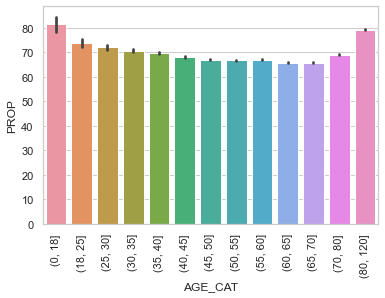

In [67]:
sns.barplot(data=bmi_df, x="AGE_CAT", y="PROP")
plt.xticks(rotation=90)

In [68]:
data.columns

Index(['PRACTICE_PATIENT_ID', 'YEAR_START', 'YEAR_END', 'STATUS', 'SEX',
       'ETHNICITY', 'INTERVAL_OF_FOLLOWUP', 'DATE_OF_BIRTH', 'DEATH_DATE',
       'INDEX_DATE', 'EXIT_DATE', 'AGE', 'INSULIN_GOLD_OPTIMAL',
       'THIAZOLIDINEDIONE_GOLD_OPTIMAL', 'SULPHONYLUREAS_GOLD_OPTIMAL',
       'MEGLITINIDES_GOLD_OPTIMAL', 'METFORMIN_GOLD_OPTIMAL',
       'DPP4INHIBITORS_GOLD_OPTIMAL', 'DPP4INHIBITORS_OPTIMAL',
       'GLP1_GOLD_OPTIMAL', 'ACARBOSE_GOLD_OPTIMAL',
       'SGLT2INHIBITORS_GOLD_OPTIMAL', 'SGLT2INHIBITORS_OPTIMAL',
       'SYSTOLIC_BLOOD_PRESSURE', 'BMI', 'HIGH_DENSITY_LIPOPROTEIN',
       'LOW_DENSITY_LIPOPROTEIN', 'SERUM_CHOLESTEROL',
       'HBA1C_-_DIABETIC_CONTROL', 'TRIGLYCERIDES', 'SERUM_CREATININE',
       'PRACTICE_ID', 'PATIENT_ID', 'AGE_CAT'],
      dtype='object')

In [69]:
data = data[data['INTERVAL_OF_FOLLOWUP'] >= 5]